In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os, sys
import pandas as pd
import PIL.Image

root = '/usr/local/serenceslab/maggie/shapeDim/'

sys.path.append(os.path.join(root, 'Analysis'))
from code_utils import file_utils, data_utils, plot_utils, grid_utils

In [2]:
from analyze_behav import process_behav
# process_behav.preproc_training_sessions(sublist=[8,9,10])

In [3]:
sublist = [1,2,3,4,5,6,7,8,9,10]
subjects = sublist
n_subj = len(subjects)

all_grid_points = grid_utils.get_full_grid()
n_pts_all_grid = all_grid_points.shape[0]


task_names = ['Linear (1)','Linear (2)','Checker'];
n_tasks = len(task_names)
acc_by_task = np.zeros((n_subj, n_tasks));
acc_by_task_easy = np.zeros((n_subj, n_tasks));
acc_by_task_hard = np.zeros((n_subj, n_tasks));

rt_by_task = np.zeros((n_subj, n_tasks));
rt_by_task_easy = np.zeros((n_subj, n_tasks));
rt_by_task_hard = np.zeros((n_subj, n_tasks));

# first and second half of training sessions
acc_by_task_eachhalf_training = np.zeros((n_subj, n_tasks, 2));
acc_by_task_easy_eachhalf_training = np.zeros((n_subj, n_tasks, 2));
acc_by_task_hard_eachhalf_training = np.zeros((n_subj, n_tasks, 2));

rt_by_task_eachhalf_training = np.zeros((n_subj, n_tasks, 2));
rt_by_task_easy_eachhalf_training = np.zeros((n_subj, n_tasks, 2));
rt_by_task_hard_eachhalf_training = np.zeros((n_subj, n_tasks, 2));

# n_runs_total = 12
# acc_by_run = np.full(fill_value=np.nan, shape=(n_subj, n_runs_total));
# rt_by_run = np.full(fill_value=np.nan, shape=(n_subj, n_runs_total));


for si, ss in enumerate(subjects):
    
    bdat = pd.read_csv(os.path.join(root, 'DataBehavior','S%02d'%ss, 'S%02d_trainingsess_preproc_all.csv'%ss), \
                       index_col = 0)
    # print(ss, bdat.shape[0]/48)
    # print(np.unique(bdat['run_difficulty']))
    
    resp = np.array(bdat['resp'])
    correct_resp = np.array(bdat['correct_resp'])
    rt = np.array(bdat['rt'])
    
    for ti in range(n_tasks):
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False)
        # print(np.sum(inds))
        acc_by_task[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task[si,ti] = np.mean(rt[inds])
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) & (bdat['is_main_grid']==1)
        acc_by_task_easy[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task_easy[si,ti] = np.mean(rt[inds])
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) & (bdat['is_main_grid']==0)
        acc_by_task_hard[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task_hard[si,ti] = np.mean(rt[inds])
        
        
        runs_overall = np.unique(bdat['run_overall'])
        print(runs_overall)
        
        # first and second half of the training sessions
        for hi, runs_do in enumerate([np.arange(1,7), np.arange(7, 13)]):
                                  
            # print(hi, runs_do)
            inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) \
                & (np.isin(bdat['run_overall'], runs_do))
            # print(np.sum(inds))
            acc_by_task_eachhalf_training[si,ti,hi] = np.mean(correct_resp[inds]==resp[inds])
            rt_by_task_eachhalf_training[si,ti,hi] = np.mean(rt[inds])

            inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) & (bdat['is_main_grid']==1) \
                & (np.isin(bdat['run_overall'], runs_do))
            acc_by_task_easy_eachhalf_training[si,ti,hi] = np.mean(correct_resp[inds]==resp[inds])
            rt_by_task_easy_eachhalf_training[si,ti,hi] = np.mean(rt[inds])

            inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) & (bdat['is_main_grid']==0) \
                & (np.isin(bdat['run_overall'], runs_do))
            acc_by_task_hard_eachhalf_training[si,ti,hi] = np.mean(correct_resp[inds]==resp[inds])
            rt_by_task_hard_eachhalf_training[si,ti,hi] = np.mean(rt[inds])

            
acc_by_task_training = acc_by_task
acc_by_task_easy_training = acc_by_task_easy
acc_by_task_hard_training = acc_by_task_hard

rt_by_task_training = rt_by_task
rt_by_task_easy_training = rt_by_task_easy
rt_by_task_hard_training = rt_by_task_hard

[ 1  2  3  4  5  6  7  9 11]
[ 1  2  3  4  5  6  7  9 11]
[ 1  2  3  4  5  6  7  9 11]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[

In [4]:
subjects = np.arange(1,11)
# subjects = [8]
n_subj = len(subjects)

task_names = ['Linear (1)','Linear (2)','Checker'];
n_tasks = len(task_names)
acc_by_task = np.zeros((n_subj, n_tasks));
acc_by_task_easy = np.zeros((n_subj, n_tasks));
acc_by_task_hard = np.zeros((n_subj, n_tasks));


rt_by_task = np.zeros((n_subj, n_tasks));
rt_by_task_easy = np.zeros((n_subj, n_tasks));
rt_by_task_hard = np.zeros((n_subj, n_tasks));

# n_runs_total = 3 * 12
# acc_by_run = np.full(fill_value=np.nan, shape=(n_subj, n_runs_total));

# n_runs_each_task = int(n_runs_total / n_tasks)
# diff_by_task = np.full(fill_value=np.nan, shape=(n_subj, n_tasks, n_runs_each_task));

# # count how many trials they respond with each category label
# resp_values = ['1','2','none']
# n_resp_each_point = np.zeros((n_subj, n_tasks, n_pts_all_grid, len(resp_values)))

for si, ss in enumerate(subjects):
    
    bdat = pd.read_csv(os.path.join(root, 'DataBehavior','S%02d'%ss, 'S%02d_maintask_preproc_all.csv'%ss), \
                       index_col = 0)
    print(ss, bdat.shape[0]/48)
    
    resp = np.array(bdat['resp'])
    correct_resp = np.array(bdat['correct_resp'])
    rt = np.array(bdat['rt'])
    
    for ti in range(n_tasks):
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False)
        acc_by_task[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task[si,ti] = np.mean(rt[inds])
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) & (bdat['is_main_grid']==1)
        acc_by_task_easy[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task_easy[si,ti] = np.mean(rt[inds])
        
        inds = (bdat['task']==(ti+1)) & (bdat['timeout']==False) & (bdat['is_main_grid']==0)
        acc_by_task_hard[si,ti] = np.mean(correct_resp[inds]==resp[inds])
        rt_by_task_hard[si,ti] = np.mean(rt[inds])
        

1 36.0
2 36.0
3 36.0
4 36.0
5 36.0
6 33.0
7 36.0
8 36.0
9 36.0
10 36.0


In [5]:
np.random.seed(343545)
jitters = np.linspace(-0.05, 0.05, n_subj)
jitters = jitters[np.random.permutation(len(jitters))]

subcolors = np.flipud(cm.tab20b(np.linspace(0,1,n_subj)))
# subcolors = cm.Blues(np.linspace(0,1,n_subj))
plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)


0.6065573770491803 0.9814814814814815
(10, 3)
0.5398065820336342 1.6824925834057378
0.65625 0.9814814814814815
(10, 3)
0.5580780580639839 1.4655436344866484


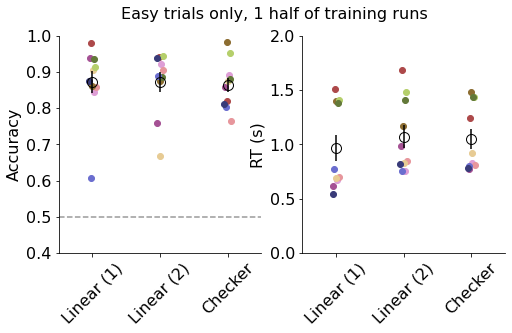

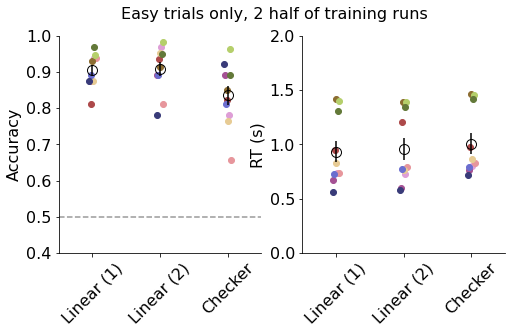

In [12]:
for sess_ind, sess in enumerate([1,2]):

    plt.rcParams['pdf.fonttype']=42
    plot_utils.set_all_font_sizes(fs = 16)

    plt.figure(figsize=(8,4))

    ax = plt.subplot(1,2,1)

    vals = acc_by_task_easy_eachhalf_training[:,:,sess_ind]
    print(np.min(vals), np.max(vals))
    print(vals.shape)

    n_tasks = vals.shape[1]
    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(vals.shape[0])
    # plt.bar(np.arange(n_tasks), meanvals, color=[0.6, 0.6, 0.6])
    plt.plot(np.arange(n_tasks), meanvals, 'o', color='k', zorder=10, markersize=10, markerfacecolor='none')
    plt.errorbar(np.arange(n_tasks), meanvals, semvals, linestyle='none', color='k', zorder=10)
    for si in range(vals.shape[0]):
        for ti in range(vals.shape[1]):
            plt.plot(ti+jitters[si], vals[si,ti], 'o', color=subcolors[si,:], markersize=6, zorder=-10)
    plt.xticks(np.arange(n_tasks), task_names, rotation=45)
    plt.ylabel('Accuracy')
    plt.ylim([0.4, 1.0])
    plt.xlim([-0.5, 2.5])
    plt.axhline(0.5, color=[0.6, 0.6, 0.6], linestyle='--')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    ax = plt.subplot(1,2,2)

    vals = rt_by_task_easy_eachhalf_training[:,:,sess_ind]
    print(np.min(vals), np.max(vals))
    n_tasks = vals.shape[1]
    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subj)

    plt.plot(np.arange(n_tasks), meanvals, 'o', color='k', zorder=10, markersize=10, markerfacecolor='none')
    plt.errorbar(np.arange(n_tasks), meanvals, semvals, linestyle='none', color='k', zorder=10)
    for si in range(n_subj):
        for ti in range(vals.shape[1]):
            plt.plot(ti+jitters[si], vals[si,ti], 'o', color=subcolors[si,:], markersize=6, zorder=-10)

    plt.xticks(np.arange(n_tasks), task_names, rotation=45)
    plt.ylabel('RT (s)')
    plt.ylim([0, 2.0])
    plt.xlim([-0.5, 2.5])
    # plt.title('response time');

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    
    plt.suptitle('Easy trials only, %d half of training runs'%(sess))

    figfolder = os.path.join(root, 'Analysis','figures')
    figname = os.path.join(figfolder, 'behav_3tasks_easy_trainingsess%d.pdf'%sess)
    plt.savefig(figname)

(10, 3)


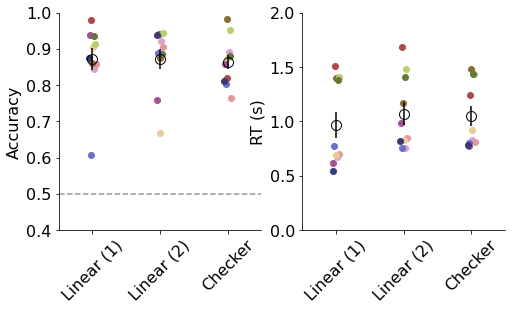

In [6]:

plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)

plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)

vals = acc_by_task_easy_eachhalf_training[:,:,0]
print(vals.shape)

n_tasks = vals.shape[1]
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(vals.shape[0])
# plt.bar(np.arange(n_tasks), meanvals, color=[0.6, 0.6, 0.6])
plt.plot(np.arange(n_tasks), meanvals, 'o', color='k', zorder=10, markersize=10, markerfacecolor='none')
plt.errorbar(np.arange(n_tasks), meanvals, semvals, linestyle='none', color='k', zorder=10)
for si in range(vals.shape[0]):
    for ti in range(vals.shape[1]):
        plt.plot(ti+jitters[si], vals[si,ti], 'o', color=subcolors[si,:], markersize=6, zorder=-10)
plt.xticks(np.arange(n_tasks), task_names, rotation=45)
plt.ylabel('Accuracy')
plt.ylim([0.4, 1.0])
plt.xlim([-0.5, 2.5])
plt.axhline(0.5, color=[0.6, 0.6, 0.6], linestyle='--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax = plt.subplot(1,2,2)

vals = rt_by_task_easy_eachhalf_training[:,:,0]
n_tasks = vals.shape[1]
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subj)

plt.plot(np.arange(n_tasks), meanvals, 'o', color='k', zorder=10, markersize=10, markerfacecolor='none')
plt.errorbar(np.arange(n_tasks), meanvals, semvals, linestyle='none', color='k', zorder=10)
for si in range(n_subj):
    for ti in range(vals.shape[1]):
        plt.plot(ti+jitters[si], vals[si,ti], 'o', color=subcolors[si,:], markersize=6, zorder=-10)
        
plt.xticks(np.arange(n_tasks), task_names, rotation=45)
plt.ylabel('RT (s)')
plt.ylim([0, 2.0])
plt.xlim([-0.5, 2.5])
# plt.title('response time');

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

figfolder = os.path.join(root, 'Analysis','figures')
figname = os.path.join(figfolder, 'behav_3tasks_easy_firsttrainingsess.pdf')
plt.savefig(figname)

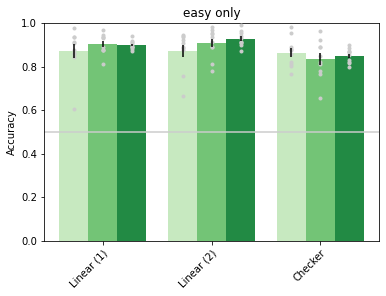

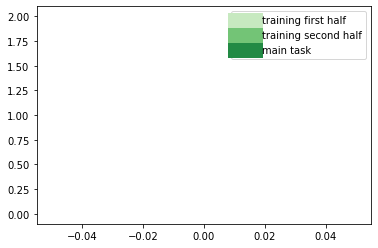

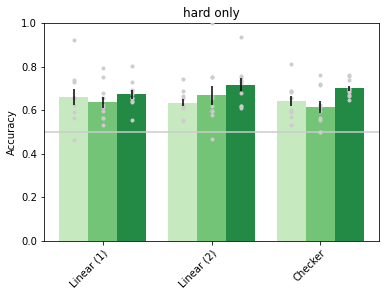

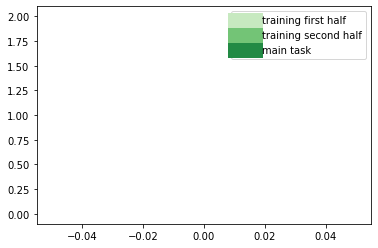

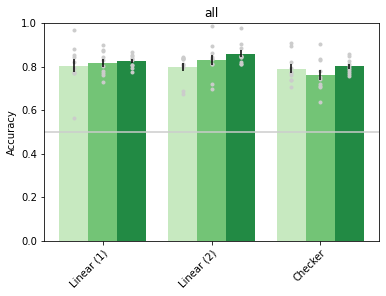

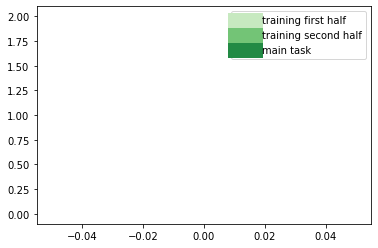

In [5]:

vals1 = np.concatenate([acc_by_task_easy_eachhalf_training[:,:,0,None], \
                        acc_by_task_easy_eachhalf_training[:,:,1,None], \
                        acc_by_task_easy[:,:,None]], axis=2)
vals2 = np.concatenate([acc_by_task_hard_eachhalf_training[:,:,0,None], \
                        acc_by_task_hard_eachhalf_training[:,:,1,None], \
                        acc_by_task_hard[:,:,None]], axis=2)
vals3 = np.concatenate([acc_by_task_eachhalf_training[:,:,0,None], \
                        acc_by_task_eachhalf_training[:,:,1,None], \
                        acc_by_task[:,:,None]], axis=2)

for [vals, name] in zip([vals1, vals2, vals3], ['easy only','hard only','all']):

    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subj)
    
    plot_utils.plot_multi_bars(mean_data=meanvals, err_data=semvals, point_data=vals, \
                               fig_size=(6,4), space = 0.1, \
                               add_ss_lines=False,\
                              colors = cm.Greens(np.linspace(0,1,5))[1:4,:], \
                              legend_labels = ['training first half','training second half','main task'], \
                              ylim = [0, 1], \
                              horizontal_line_pos = 0.5, \
                              xticklabels = task_names, \
                              title = name, \
                              ylabel='Accuracy');


In [8]:
acc_by_task_easy_eachhalf_training[:,:,0]

array([[0.84375   , 0.921875  , 0.890625  ],
       [0.9375    , 0.75806452, 0.859375  ],
       [0.859375  , 0.90625   , 0.765625  ],
       [0.9787234 , 0.94117647, 0.82      ],
       [0.90625   , 0.66666667, 0.875     ],
       [0.86206897, 0.875     , 0.98148148],
       [0.91304348, 0.94339623, 0.95348837],
       [0.93650794, 0.88709677, 0.88135593],
       [0.60655738, 0.88888889, 0.80327869],
       [0.875     , 0.9375    , 0.8125    ]])

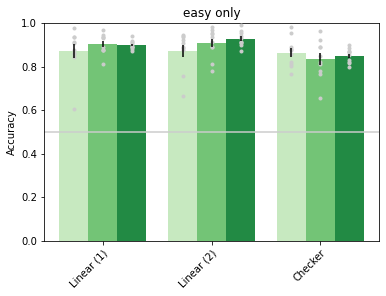

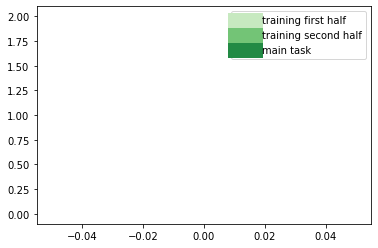

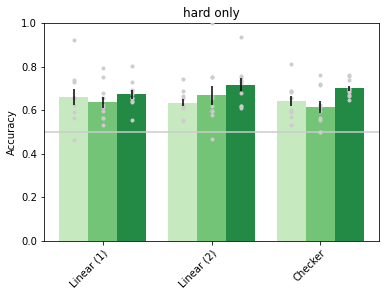

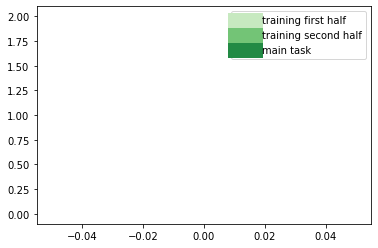

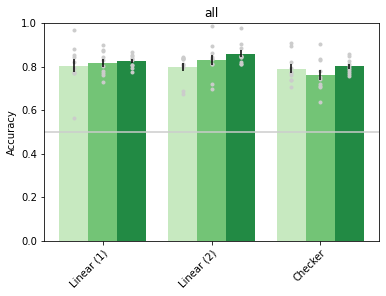

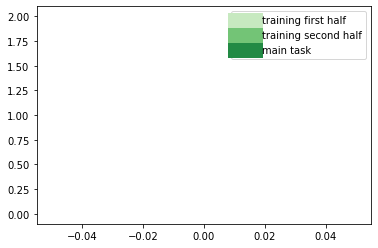

In [5]:
vals1 = np.concatenate([acc_by_task_easy_eachhalf_training[:,:,0,None], \
                        acc_by_task_easy_eachhalf_training[:,:,1,None], \
                        acc_by_task_easy[:,:,None]], axis=2)
vals2 = np.concatenate([acc_by_task_hard_eachhalf_training[:,:,0,None], \
                        acc_by_task_hard_eachhalf_training[:,:,1,None], \
                        acc_by_task_hard[:,:,None]], axis=2)
vals3 = np.concatenate([acc_by_task_eachhalf_training[:,:,0,None], \
                        acc_by_task_eachhalf_training[:,:,1,None], \
                        acc_by_task[:,:,None]], axis=2)

for [vals, name] in zip([vals1, vals2, vals3], ['easy only','hard only','all']):

    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subj)
    
    plot_utils.plot_multi_bars(mean_data=meanvals, err_data=semvals, point_data=vals, \
                               fig_size=(6,4), space = 0.1, \
                               add_ss_lines=False,\
                              colors = cm.Greens(np.linspace(0,1,5))[1:4,:], \
                              legend_labels = ['training first half','training second half','main task'], \
                              ylim = [0, 1], \
                              horizontal_line_pos = 0.5, \
                              xticklabels = task_names, \
                              title = name, \
                              ylabel='Accuracy');

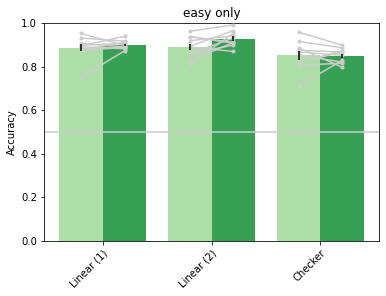

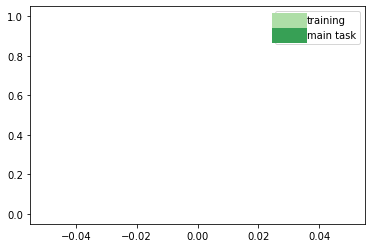

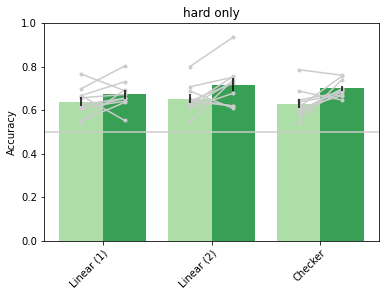

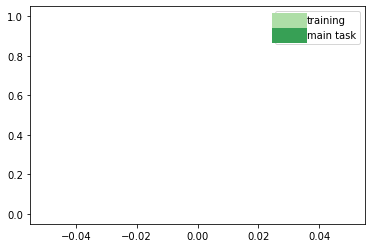

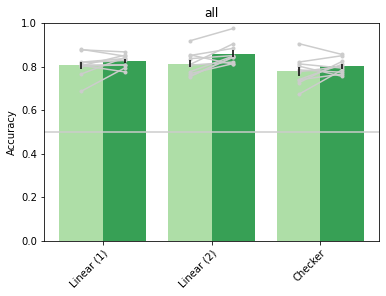

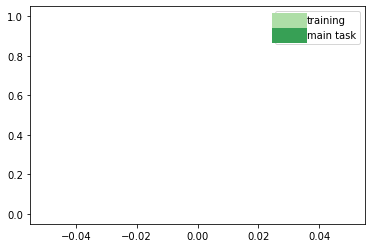

In [33]:

vals1 = np.concatenate([acc_by_task_easy_training[:,:,None], acc_by_task_easy[:,:,None]], axis=2)
vals2 = np.concatenate([acc_by_task_hard_training[:,:,None], acc_by_task_hard[:,:,None]], axis=2)
vals3 = np.concatenate([acc_by_task_training[:,:,None], acc_by_task[:,:,None]], axis=2)

for [vals, name] in zip([vals1, vals2, vals3], ['easy only','hard only','all']):

    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subj)
    
    plot_utils.plot_multi_bars(mean_data=meanvals, err_data=semvals, point_data=vals, \
                               fig_size=(6,4), space = 0.1, \
                               add_ss_lines=True,
                              colors = cm.Greens(np.linspace(0,1,4))[1:3,:], \
                              legend_labels = ['training','main task'], \
                              ylim = [0, 1], \
                              horizontal_line_pos = 0.5, \
                              xticklabels = task_names, \
                              title = name, \
                              ylabel='Accuracy');
